In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging

from fundus_data_toolkit.datamodules import (
    CLASSIF_PATHS,
    SEG_PATHS,
    USER_SETTING,
    DataHookPosition,
    Task,
    register_paths,
)
from fundus_data_toolkit.datamodules.classification import (
    AptosDataModule,
    DDRDataModule,
    EyePACSDataModule,
    IDRiDDataModule,
)
from fundus_data_toolkit.datamodules.utils import merge_existing_datamodules
from nntools import NNOpt

# root = logging.getLogger()
# root.setLevel(logging.NOTSET)

In [3]:
paths = {
    "EYEPACS": "/home/clement/Documents/data/eyepacs/",
    "APTOS": "/home/clement/Documents/data/aptos/",
    "DDR": "/home/clement/Documents/data/DDR-dataset/DR_grading/",
    "IDRID": "/home/clement/Documents/data/IDRID/B. Disease Grading/",
}
register_paths(paths, task=Task.CLASSIFICATION)

In [4]:
CLASSIF_PATHS

{'EYEPACS': '/home/clement/Documents/data/eyepacs/',
 'APTOS': '/home/clement/Documents/data/aptos/',
 'DDR': '/home/clement/Documents/data/DDR-dataset/DR_grading/',
 'IDRID': '/home/clement/Documents/data/IDRID/B. Disease Grading/'}

In [5]:
img_size = (512, 512)
idrid_datamodule = IDRiDDataModule(
    CLASSIF_PATHS.IDRID,
    img_size=img_size,
    batch_size=64,
    valid_size=0.2,
    use_cache=False,
    num_workers=8,
    precise_autocrop=True,
    cache_option=NNOpt.CACHE_MEMORY,
).setup_all()
eyepacs_datamodule = EyePACSDataModule(
    CLASSIF_PATHS.EYEPACS,
    img_size=img_size,
    batch_size=64,
    use_cache=False,
    num_workers=8,
    precise_autocrop=True,
    cache_option=NNOpt.CACHE_DISK,
    cache_dir="cestuntest",
).setup_all()
aptos_datamodule = AptosDataModule(
    CLASSIF_PATHS.APTOS,
    img_size=img_size,
    batch_size=64,
    use_cache=False,
    num_workers=8,
    precise_autocrop=True,
    cache_option=NNOpt.CACHE_MEMORY,
).setup_all()
ddr_datamodule = DDRDataModule(
    CLASSIF_PATHS.DDR,
    img_size=img_size,
    batch_size=64,
    use_cache=False,
    num_workers=8,
    cache_option=NNOpt.CACHE_MEMORY,
    precise_autocrop=True,
).setup_all()
datamodules = {
    "IDRID": idrid_datamodule,
    "EYEPACS": eyepacs_datamodule,
    "APTOS": aptos_datamodule,
    "DDR": ddr_datamodule,
}
# ddr_datamodule.train.plot(0)

/home/clement/Documents/Projets/NNTools/src/nntools/utils/plotting.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


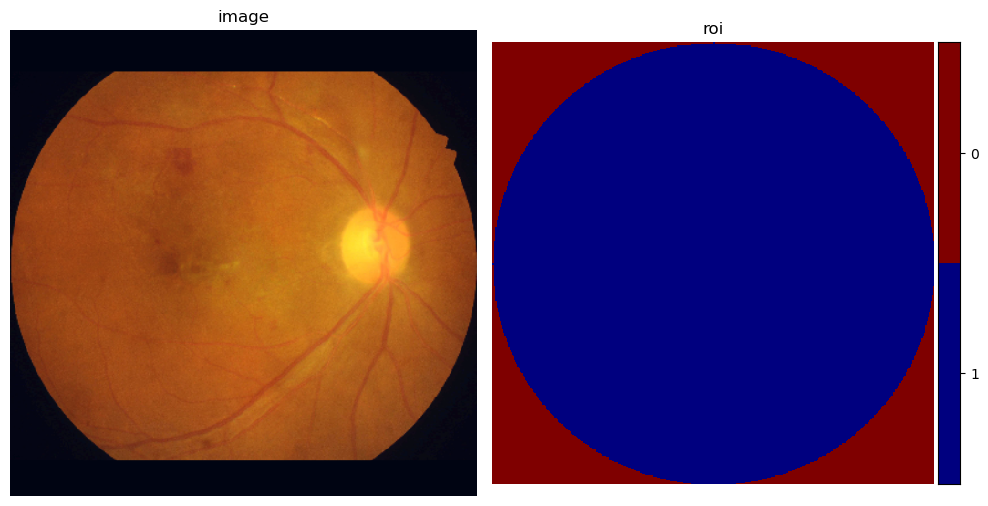

In [6]:
all_datamodule = merge_existing_datamodules(list(datamodules.values()))


all_datamodule.train.plot(0)